<a href="https://colab.research.google.com/github/Jonathan-Hughes1524/github-slideshow/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and Exploring Data

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
#Mount Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load data and make eda copy for data cleaing
path = '/content/drive/MyDrive/Coding Dojo/08 Week 8:/wine.csv'
df = pd.read_csv(path)
eda_df = df.copy()
eda_df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [ ]:
#Check data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
# Check duplicates
eda_df.duplicated().sum()

5452

In [ ]:
# Drop duplicates
eda_df = eda_df.drop_duplicates()
eda_df.duplicated().sum()

0

In [ ]:
for col in eda_df.select_dtypes('object'):
  print(eda_df[col].value_counts())

Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El Jardin de las Iguales Vinedo

In [ ]:
#Check for missing
eda_df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [ ]:
#Locating all missings
eda_df.loc[eda_df.isna().any(axis=1)]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0,3.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45000,Red,NaN,NaN
2022,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50000,Ribera Del Duero Red,NaN,NaN
2023,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63000,Ribera Del Duero Red,NaN,NaN
2024,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00000,Rioja Red,NaN,NaN


In [ ]:
#View missing year
eda_df[eda_df['year'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,131,Espana,Vino de Espana,40.0,Tempranillo,4.0,2.0


In [ ]:
#View missing body
eda_df[eda_df['body'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45000,Red,NaN,NaN
2022,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50000,Ribera Del Duero Red,NaN,NaN
2023,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63000,Ribera Del Duero Red,NaN,NaN
2024,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00000,Rioja Red,NaN,NaN


In [ ]:
#View missing type
eda_df[eda_df['type'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1934,Gramona,Gessami,2020,4.2,692,Espana,Penedes,11.20000,NaN,NaN,NaN
1982,Emilio Moro,La Revelia Godello,2018,4.2,484,Espana,Bierzo,21.95000,NaN,NaN,NaN
1995,Culebron,Fondillon Gran Reserva,1964,4.2,432,Espana,Alicante,49.95000,NaN,NaN,NaN
2011,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


In [ ]:
#View missing acidity
eda_df[eda_df['acidity'].isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45000,Red,NaN,NaN
2022,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50000,Ribera Del Duero Red,NaN,NaN
2023,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63000,Ribera Del Duero Red,NaN,NaN
2024,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00000,Rioja Red,NaN,NaN


For the body and acidity I am going to do the average for thos. For the missing type I will do the most frequent to fill in the missing. For the year I am going to drop the rows for that since I will still have 99.7% of the data for that column.

This will be dealt with later in our machine learning process.

In [ ]:
eda_df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [ ]:
dtypes = eda_df.dtypes
str_cols = dtypes[dtypes == 'object'].index
str_cols

Index(['winery', 'wine', 'year', 'country', 'region', 'type'], dtype='object')

In [ ]:
for col in str_cols:
  print(f'- Columns={col}')
  print(eda_df[col].value_counts(dropna = False))
  print('\n\n')

- Columns=winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



- Columns=wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero           

In [ ]:
dtypes = eda_df.dtypes
str_cols = dtypes[dtypes == 'float'].index
str_cols

Index(['rating', 'price', 'body', 'acidity'], dtype='object')

In [ ]:
for float in str_cols:
  print(f'- Columns={float}')
  print(eda_df[float].value_counts(dropna = False))
  print('\n\n')

- Columns=rating
4.3    706
4.4    484
4.5    281
4.2    228
4.6    191
4.7    112
4.8     44
4.9      2
Name: rating, dtype: int64



- Columns=price
75.00     16
95.00     12
34.90     12
59.90     12
26.90     11
          ..
75.92      1
47.52      1
94.20      1
185.15     1
995.00     1
Name: price, Length: 1292, dtype: int64



- Columns=body
4.0    1003
5.0     634
NaN     271
3.0     106
2.0      34
Name: body, dtype: int64



- Columns=acidity
3.0    1672
NaN     271
2.0      70
1.0      35
Name: acidity, dtype: int64





#Visualizations of data

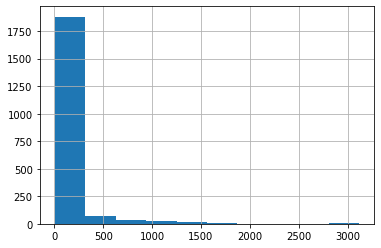

In [ ]:
# target visualization 
eda_df['price'].hist()

There are few outliers here but the price does seem reasonable.

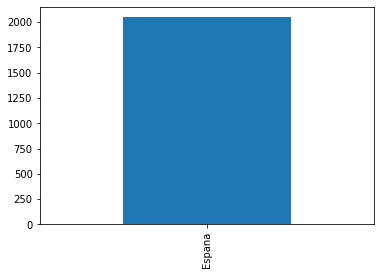

In [ ]:
eda_df['country'].value_counts().plot(kind='bar');

No outliers but this seems to be data that isn't needed since all wines are from here.

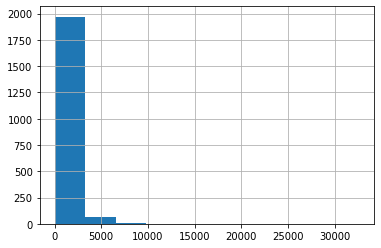

In [ ]:
eda_df['num_reviews'].hist()

There don't appear to be outliers.

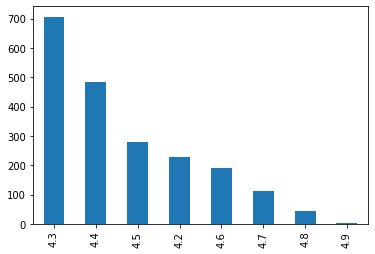

In [ ]:
eda_df['rating'].value_counts().plot(kind='bar');

There is one outlier but it seems reasonable.

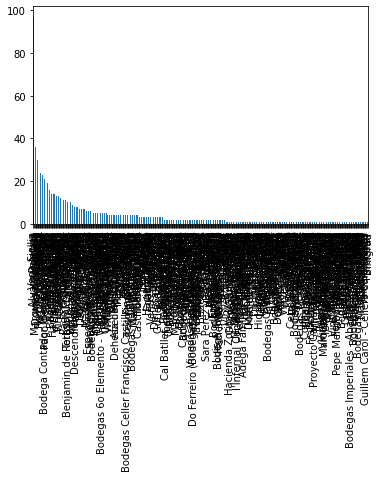

<Figure size 7200x7200 with 0 Axes>

In [ ]:
eda_df['winery'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.figure(figsize=(100,100));

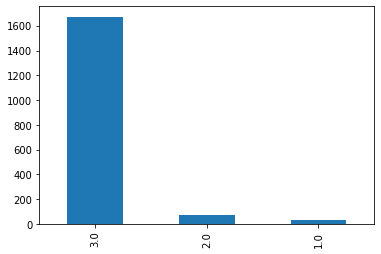

In [ ]:
eda_df['acidity'].value_counts().plot(kind='bar');

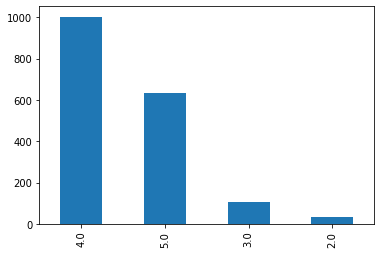

In [ ]:
eda_df['body'].value_counts().plot(kind='bar');

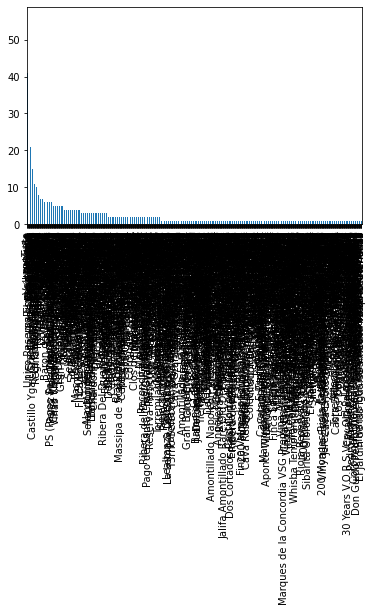

In [ ]:
eda_df['wine'].value_counts().plot(kind='bar')
plt.xticks(rotation=90);

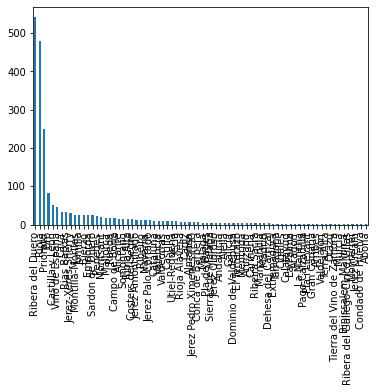

In [ ]:
eda_df['region'].value_counts().plot(kind='bar');

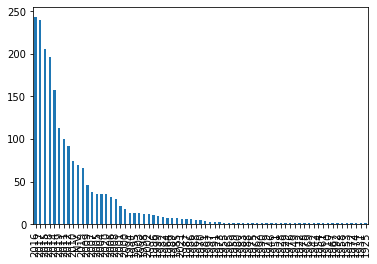

In [ ]:
eda_df['year'].value_counts().plot(kind='bar')
plt.xticks(rotation=90);

#Correlation and Visualization

In [ ]:
corr = eda_df.corr()

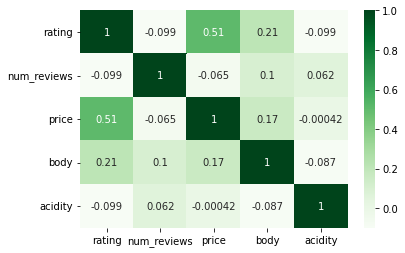

In [ ]:
#Heat Map 
sns.heatmap(corr, cmap='Greens', annot= True)

Based on the heat map which shows correlation between features. We can see a correlation between price and rating. We also see a slight correlation between body and rating. 

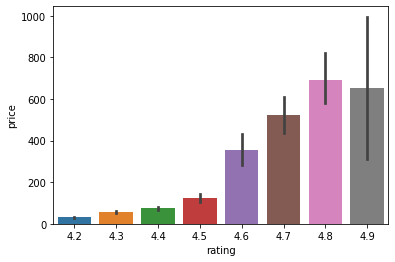

In [ ]:
sns.barplot(data = eda_df, x = 'rating', y = 'price')

From this bar graph above you are able to see that the better the rating the more people are willing to pay for their wine. It is my recommendation to improve the wines raiting to see a higher profit on the investment. To achieve this we shall look at body and how it relates to rating.

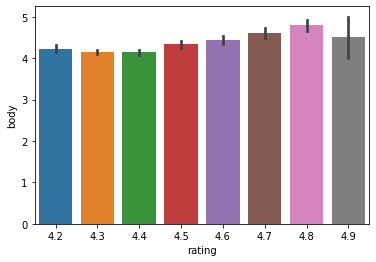

In [ ]:
sns.barplot(data = eda_df, x='rating', y='body')

The data here shows us that body does have some affect on the rating. We can see that all of the high ratings, which are the higher prices, have a high body. For the wine to make the most money we need a higher rating. Having a good bodied wine will increase the rating into the range we want

#Model Development

In [ ]:
#Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [ ]:
ml_df = df.copy()
ml_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Making a copy of original data to perform machine learning on.

In [ ]:
ml_df.duplicated().sum()

5452

In [ ]:
#Drop duplicates
ml_df = ml_df.drop_duplicates()
ml_df.duplicated().sum()

0

In [ ]:
#Check for missing
ml_df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Missings will be dealt during the machine learning pipeline. 

In [ ]:
#Assign the target and feature
y = ml_df['price']
X = ml_df.drop(columns='price')

In [ ]:
#Train Test Split the Data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
#Pre-process for Machine Learning with a pipeline
#Dummy encode the categorical feature(s) using OneHotEncoder (this will be a part of our pipeline)
#Scale teh quantitative feature(s) using StandardScaler so it (this will be pare of our pipeline)

#There is only one categorical feature (column) here but it can be very helpful to define a variable for each type of feature... be careful defing features based only on dtype
cat_feat = make_column_selector(dtype_include = 'object')
#This will identify all the quantitavi features columns
quant_feat = make_column_selector(dtype_include ='number')

#Instantiate the column transformer you want to use
encoder = OneHotEncoder(sparse= False, handle_unknown = 'ignore')

#Scale the data to be ready for clustering (KNN)
scaler = StandardScaler()

#We will use mean imputer to impute values missing for the numeric columns
mean_imputer = SimpleImputer(strategy='mean')

#We will use most frequent imputer to impute values for the categorical columns
freq_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

In [ ]:
num_tuple = (num_processor, quant_feat)
cat_tuple = (cat_processor, cat_feat)

In [ ]:
#Now make the column transformer... this matches the transformations that we want with teh approriate columns.
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder ='passthrough')

In [ ]:
#Try a default KNN model in the pipeline
#Instantiate the model
knn = KNeighborsRegressor()

#Make the pipeline...notice we included teh column_transformer her
knn_pipe = make_pipeline(column_transformer, knn)

In [ ]:
#Fit on training data only
knn_pipe.fit(X_train, y_train)

#Obtain evaluation metrics on both the train and test sets.
#Be sure to use metrics appropriate for the type of problem (regression metrics for regression or classification metrics for classification)

print('KNN Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_pipe.predict(X_train))))
print('Knn Testing RMSE:', np.sqrt(mean_squared_error(y_test, knn_pipe.predict(X_test))))
print('-----')
print('KNN Training R2:', r2_score(y_train, knn_pipe.predict(X_train)))
print('KNN Testing R2:', r2_score(y_test, knn_pipe.predict(X_test)))

KNN Training RMSE: 116.19902378678061
Knn Testing RMSE: 171.68491806490496
-----
KNN Training R2: 0.8224648090185287
KNN Testing R2: 0.565599112855882


In [ ]:
#Hypertune the KNN model
# The following code gvies a lits of hyperparameters to tune and how to define them within a pipeline usoing the model name

knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fcaf2349810>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [ ]:
#Define the hyperparameters you want to test
knn_params = {'kneighborsregressor__n_neighbors':[5,7,9,11],
              'kneighborsregressor__leaf_size':[15,20,30]}

In [ ]:
#Instantiate the GridSearch with the KNN pipeline and the knn_params
knn_gs = GridSearchCV(knn_pipe, knn_params)




In [ ]:
knn_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fcaf2349810>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [ ]:
#see which hyperparameters gave the best results
knn_gs.best_params_

{'kneighborsregressor__leaf_size': 15, 'kneighborsregressor__n_neighbors': 9}

In [ ]:
print('KNN_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, knn_gs.predict(X_train))))
print('KNN_GS Test RMSE:', np.sqrt(mean_squared_error(y_test,knn_gs.predict(X_test))))
print('-----')
print('KNN_GS Training R2:', r2_score(y_train, knn_gs.predict(X_train)))
print('KNN_GS Testing R2:', r2_score(y_test, knn_gs.predict(X_test)))

KNN_GS Training RMSE: 135.74039035435396
KNN_GS Test RMSE: 173.07981083053645
-----
KNN_GS Training R2: 0.7577310928328583
KNN_GS Testing R2: 0.5585116619548744


In [ ]:
#Try a default random forest model in the pipeline
#Instantiate the model, notice that you can change the hyperparameters in this step. This just shows setting a random_state
# We will use defualts here since our hyperparameters will be done with GridSearchCV
rf = RandomForestRegressor(random_state=42)

In [ ]:
#Make the pipeline and include the column_transformer
rf_pipe = make_pipeline(column_transformer, rf)
#fit on teh training data
rf_pipe.fit(X_train,y_train)

#Obtain evaluation metrics on both train and test sets
print('RF Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train))))
print('RF Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test))))
print('RF Training R2:', r2_score(y_train, rf_pipe.predict(X_train)))
print('RF Testing R2:', r2_score(y_test, rf_pipe.predict(X_test)))

RF Training RMSE: 53.77156320934015
RF Testing RMSE: 173.74099573055753
RF Training R2: 0.9619823894866717
RF Testing R2: 0.555132146140879


In [ ]:
#Now We will hypertune the random forest model
# to see hyperparameters available and to remember how to define them within a pipeline, use the following
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fcaf2349810>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [ ]:
#Define the hyperparameters you want to test
rf_params = {'randomforestregressor__max_depth': [None, 5],
             'randomforestregressor__n_estimators': [100,300,500],
             'randomforestregressor__min_samples_split':[2,4]}

In [ ]:
#Instantiate the GridSearch with the random forest pipeline
rf_gs = GridSearchCV(rf_pipe, rf_params)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fcaf2349810>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [ ]:
# See whcih hyperparameters gave the best result
rf_gs.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__min_samples_split': 4,
 'randomforestregressor__n_estimators': 300}

In [ ]:
#Obtain the evaluation metrics of the tuned model for both the train and test sets
#Refer to the baseline RMSE as a reference for interpretation
print('RF_GS Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_gs.predict(X_train))))
print('RF_GS Testing RMSE:', np.sqrt(mean_squared_error(y_train, rf_gs.predict(X_train))))
print('-----')
print('RF_GS Training R2:', r2_score(y_train, rf_gs.predict(X_train)))
print('RF_GS Testing R2:', r2_score(y_test, rf_gs.predict(X_test)))

RF_GS Training RMSE: 66.07214846393605
RF_GS Testing RMSE: 66.07214846393605
-----
RF_GS Training R2: 0.9425994107553216
RF_GS Testing R2: 0.5552003494715313


Based on the models and hypertuning them the KNN model is the best one to use. However, I am going to attempt PCA model to see if there are better results.

#PCA Model

In [ ]:
#Import Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [ ]:
pca_pipe = make_pipeline(column_transformer)

In [ ]:
pca_df= pca_pipe.fit_transform(X_train)

In [ ]:
#Apply PCA

#Instantiate, fit and transform data using PCA
pca = PCA(n_components=10)
pcs= pca.fit_transform(pca_df)

In [ ]:
X_train.shape

(1536, 10)

Text(0, 0.5, 'PC2')

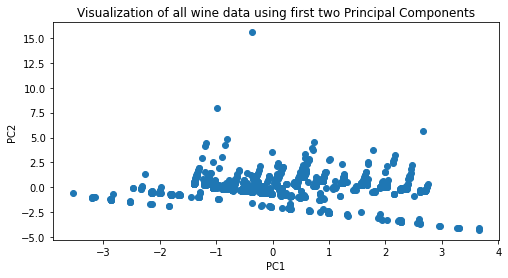

In [ ]:
#Visualize Data

#Visualize the first 2 PCs
plt.figure(figsize= (8,4))
plt.scatter(pcs[:,0],pcs[:,1])
plt.title('Visualization of all wine data using first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

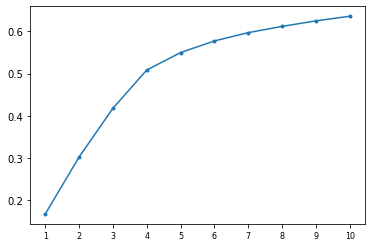

In [ ]:
#plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), marker = '.')
plt.xticks(ticks=range(1,11), fontsize=8);

Text(0, 0.5, 'Proportion of Explained Variance')

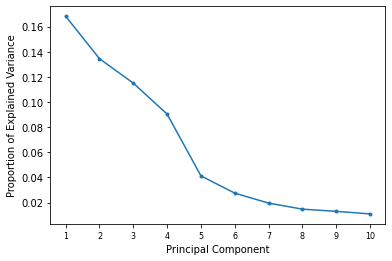

In [ ]:
#Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1,11),pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1,11), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

The above graph shows up how many principal components we should keep. We are going to keep 5 components based on the inertia point.

In [ ]:
#PCA with 5 components
pca5= PCA(n_components = 5)

In [ ]:
#Create a transformer pipeline
transformer = make_pipeline(column_transformer, PCA(n_components=5))

In [ ]:
#Put PCA in linea pipeline
pca_linreg = LinearRegression()


In [ ]:
#Create a modeling pipeline
pca_linreg_pipe = make_pipeline(transformer, pca_linreg)
pca_linreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7fcaf2349810>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
             

In [ ]:
#Evaluate Model
print('Training Accuracy', pca_linreg_pipe.score(X_train,y_train))
print('Testing', pca_linreg_pipe.score(X_test,y_test))

Training Accuracy 0.3019740302433396
Testing 0.17125846549613377


#Choose Model

Based on the models we will use the KNN to predict the price of the wine. This gives us the best R2 score of the models and will allow us to do the best price prediction for a wine. This will allow us to get the wine priced so that we can optimize sales.